In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/project ai/UCI Heart Disease Data.csv')
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
df.columns.values

array(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
       'num'], dtype=object)

In [ ]:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


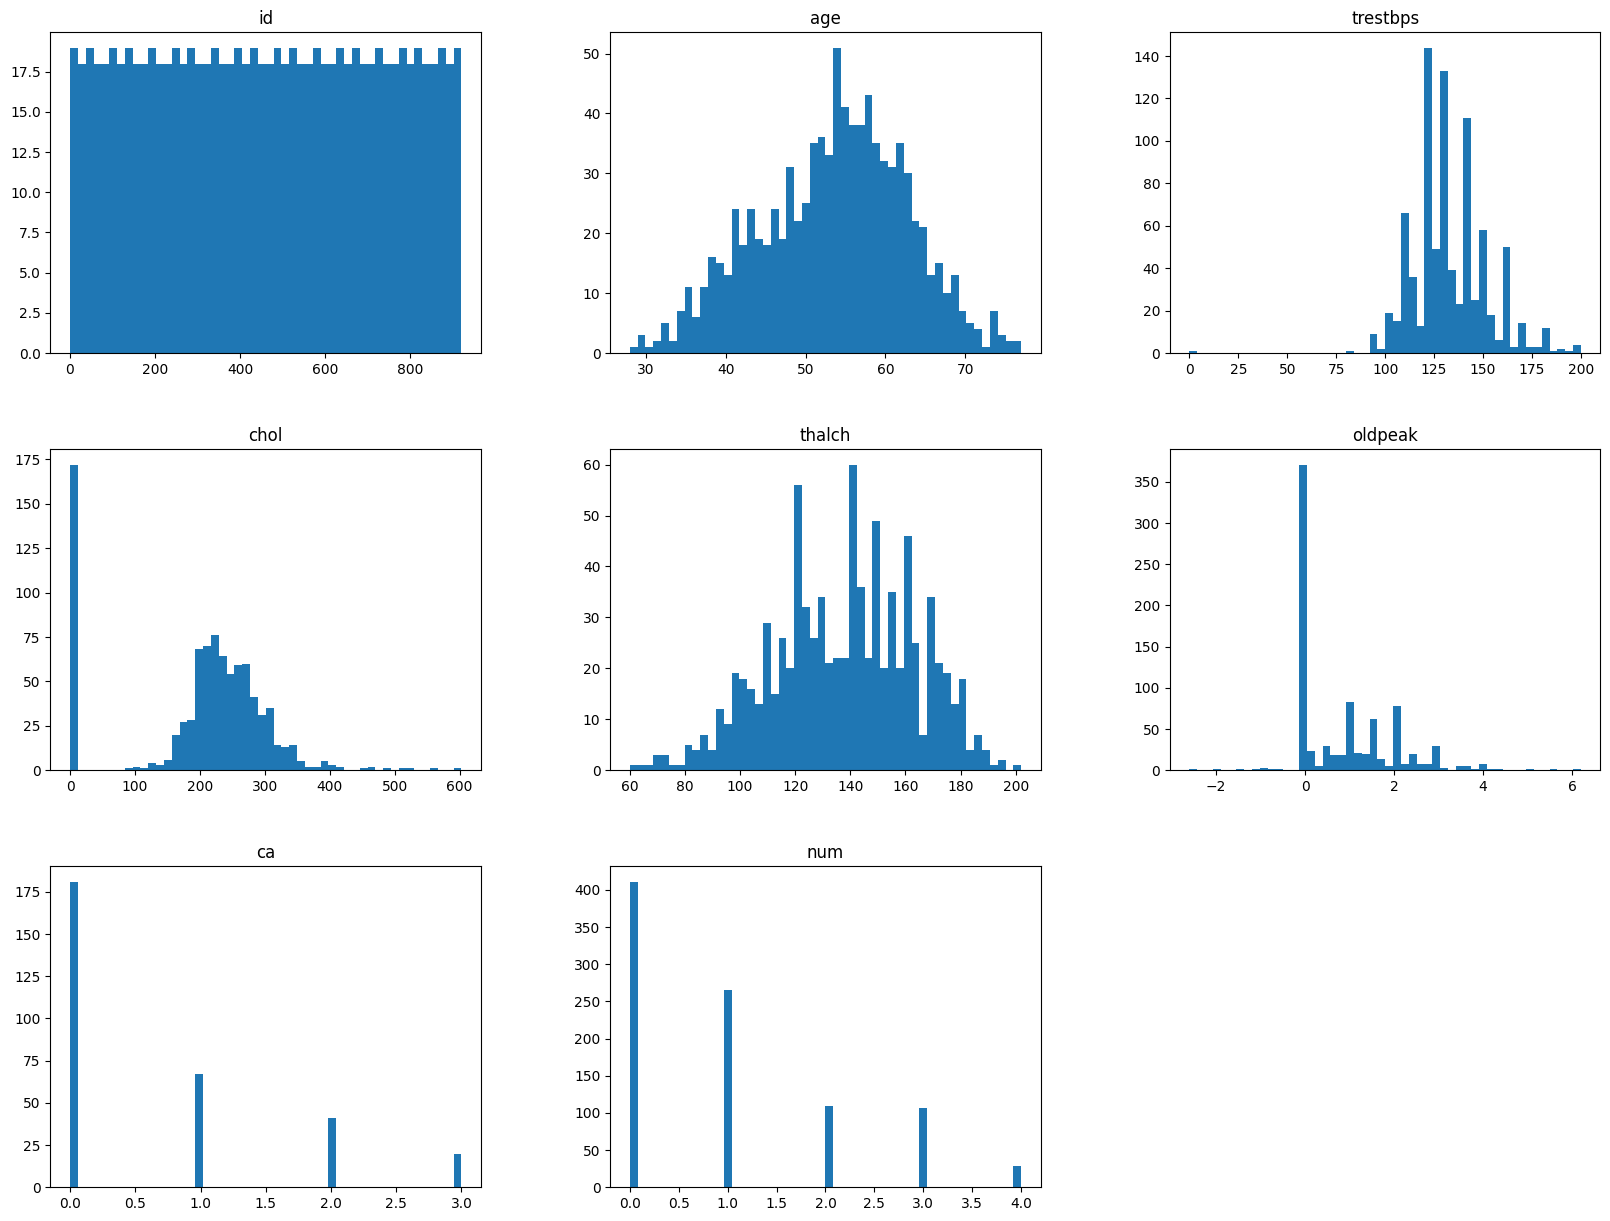

In [ ]:
df.hist(bins = 50, grid = False, figsize = (20,15));

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
#handle missing value
missing_counts = df.isna().sum()
print(missing_counts[missing_counts > 0])

trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64


In [ ]:
#Duplicate rows remove
print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)
print("Shape after dropping duplicates:", df.shape)

Duplicates before: 0
Shape after dropping duplicates: (920, 16)


In [ ]:
#Correct data type
if 'oldpeak' in df.columns:
    df['oldpeak'] = df['oldpeak'].astype('float64')
    print(df['oldpeak'].value_counts())

oldpeak
 0.0    370
 1.0     83
 2.0     76
 1.5     48
 3.0     28
 0.5     19
 1.2     17
 2.5     16
 0.8     15
 1.4     15
 0.6     14
 0.2     14
 1.6     14
 1.8     12
 0.4     10
 0.1      9
 4.0      8
 2.6      7
 2.8      7
 2.2      5
 1.3      5
 0.3      5
 0.7      5
 1.9      5
 1.1      4
 3.6      4
 2.4      4
 0.9      4
 3.4      3
-0.5      2
 3.2      2
 2.3      2
 3.5      2
 1.7      2
-1.0      2
 4.2      2
 2.1      2
 3.1      1
 2.9      1
 6.2      1
 5.6      1
 3.8      1
-1.1      1
 4.4      1
 5.0      1
-2.6      1
-0.1      1
-1.5      1
-2.0      1
-0.7      1
-0.8      1
-0.9      1
 3.7      1
Name: count, dtype: int64


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/project ai/UCI Heart Disease Data.csv")
print("Dataset Loaded Successfully!")

Dataset Loaded Successfully!


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("//content/drive/MyDrive/project ai/UCI Heart Disease Data.csv")

# Categorical columns in your dataset
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

le = LabelEncoder()

for col in categorical_cols:
    if col in df.columns:

        # 1. Fill missing values first
        df[col] = df[col].fillna(df[col].mode()[0])

        # 2. If string → Label Encode it
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])

        # 3. Now safely convert to int
        df[col] = df[col].astype(int)

print("✔ All categorical columns encoded successfully!")


✔ All categorical columns encoded successfully!


/tmp/ipython-input-3325805646.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])
/tmp/ipython-input-3325805646.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
# One-Hot Encoding for multi-class categorical features in UCI Heart Disease dataset

multi_class_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']

# Keep only valid columns
multi_class_cols = [col for col in multi_class_cols if col in df.columns]

if len(multi_class_cols) > 0:
    print("Applying One-Hot Encoding on:", multi_class_cols)

    from sklearn.preprocessing import OneHotEncoder
    import pandas as pd

    # One-Hot Encoder setup
    ohe = OneHotEncoder(sparse_output=False, drop='first')  # updated for sklearn 1.2+ compatibility

    # Transform categorical columns
    ohe_array = ohe.fit_transform(df[multi_class_cols])

    # Convert to DataFrame
    ohe_df = pd.DataFrame(
        ohe_array,
        columns=ohe.get_feature_names_out(multi_class_cols),
        index=df.index
    )

    # Drop original categorical columns
    df = df.drop(multi_class_cols, axis=1)

    # Merge encoded features
    df = pd.concat([df, ohe_df], axis=1)

else:
    print("No multi-class categorical columns found for One-Hot Encoding.")
    df.info()


Applying One-Hot Encoding on: ['cp', 'restecg', 'slope', 'ca', 'thal']


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns after encoding
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Remove ID column if exists
if 'id' in numeric_cols:
    numeric_cols = numeric_cols.drop('id')

# Remove target column
if 'num' in numeric_cols:
    numeric_cols = numeric_cols.drop('num')

print("Numeric Columns to Scale:", list(numeric_cols))

# Apply StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Scaling Completed!")


Numeric Columns to Scale: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'restecg_nan', 'slope_flat', 'slope_upsloping', 'slope_nan', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'ca_nan', 'thal_normal', 'thal_reversable defect', 'thal_nan']
Scaling Completed!


In [ ]:
from sklearn.model_selection import train_test_split
target = 'num'
# Remove ID and target from feature list
features = [c for c in df.columns if c not in ['id', 'num']]
# Split features and target
X = df[features]
y = df[target]
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

print("\nTrain class distribution:\n", y_train.value_counts(normalize=True))
print("\nTest class distribution:\n", y_test.value_counts(normalize=True))

Train shape: (736, 25) (736,)
Test shape: (184, 25) (184,)

Train class distribution:
 num
0    0.447011
1    0.288043
2    0.118207
3    0.116848
4    0.029891
Name: proportion, dtype: float64

Test class distribution:
 num
0    0.445652
1    0.288043
2    0.119565
3    0.114130
4    0.032609
Name: proportion, dtype: float64


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# BINARY CATEGORICAL COLUMNS → Label Encoding
binary_cols = ['sex', 'fbs', 'exang']  # update if needed
binary_cols = [c for c in binary_cols if c in df.columns]
if len(binary_cols) > 0:
    print("Label Encoding:", binary_cols)
    le = LabelEncoder()
    for col in binary_cols:
        df[col] = le.fit_transform(df[col].astype(str))
# MULTI-CLASS CATEGORICAL → One-Hot Encoding
multi_class_cols = ['cp', 'restecg', 'slope', 'ca', 'thal']
multi_class_cols = [col for col in multi_class_cols if col in df.columns]

if len(multi_class_cols) > 0:
    print("One-Hot Encoding:", multi_class_cols)

    ohe = OneHotEncoder(sparse_output=False, drop='first')

    ohe_array = ohe.fit_transform(df[multi_class_cols])

    ohe_df = pd.DataFrame(
        ohe_array,
        columns=ohe.get_feature_names_out(multi_class_cols),
        index=df.index
    )

    df = df.drop(multi_class_cols, axis=1)
    df = pd.concat([df, ohe_df], axis=1)
#Check final types
print("\nFinal columns type:")
print(df.dtypes)

Label Encoding: ['sex', 'fbs', 'exang']

Final columns type:
id                            int64
age                         float64
sex                           int64
dataset                      object
trestbps                    float64
chol                        float64
fbs                           int64
thalch                      float64
exang                         int64
oldpeak                     float64
num                           int64
cp_atypical angina          float64
cp_non-anginal              float64
cp_typical angina           float64
restecg_normal              float64
restecg_st-t abnormality    float64
restecg_nan                 float64
slope_flat                  float64
slope_upsloping             float64
slope_nan                   float64
ca_1.0                      float64
ca_2.0                      float64
ca_3.0                      float64
ca_nan                      float64
thal_normal                 float64
thal_reversable defect      float64
tha

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

df = pd.read_csv("/content/drive/MyDrive/project ai/UCI Heart Disease Data.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.fillna(df.median(numeric_only=True))
df['num'] = df['num'].apply(lambda x: 1 if x>0 else 0)

X = df.drop(['id','num'], axis=1)
X = pd.get_dummies(X, drop_first=True)   # <-
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    print(f"{name} Accuracy: {acc:.4f}")

Logistic Regression Accuracy: 0.8207
SVM Accuracy: 0.8478
KNN Accuracy: 0.8478
Random Forest Accuracy: 0.8424
Decision Tree Accuracy: 0.7880



Model: Logistic Regression
Accuracy: 0.8206521739130435

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.79        82
           1       0.81      0.88      0.85       102

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.82      0.82      0.82       184



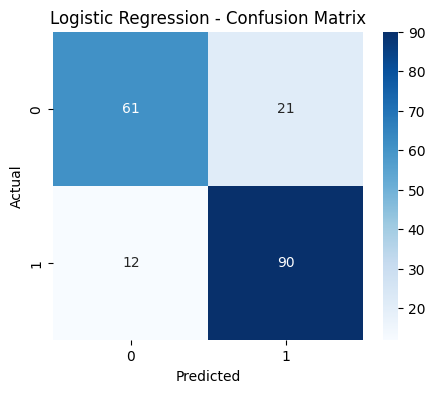


Model: SVM
Accuracy: 0.8478260869565217

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        82
           1       0.83      0.91      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



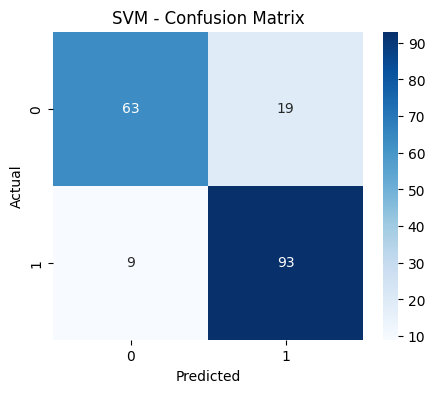


Model: KNN
Accuracy: 0.8478260869565217

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        82
           1       0.83      0.91      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



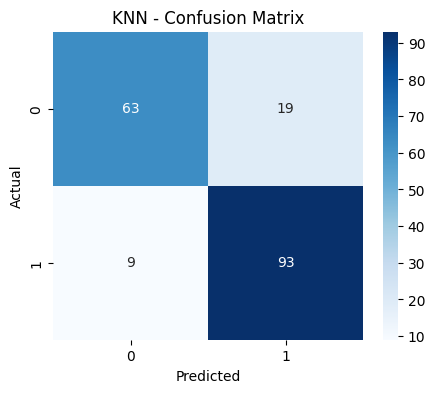


Model: Random Forest
Accuracy: 0.842391304347826

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        82
           1       0.85      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



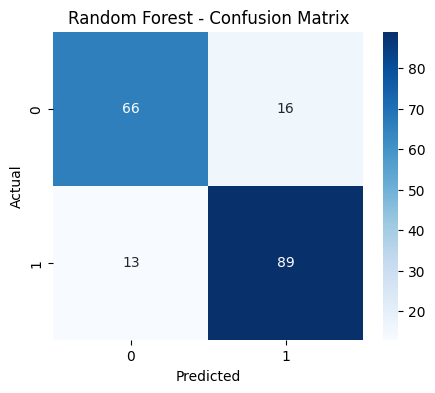


Model: Decision Tree
Accuracy: 0.7880434782608695

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.70      0.75        82
           1       0.78      0.86      0.82       102

    accuracy                           0.79       184
   macro avg       0.79      0.78      0.78       184
weighted avg       0.79      0.79      0.79       184



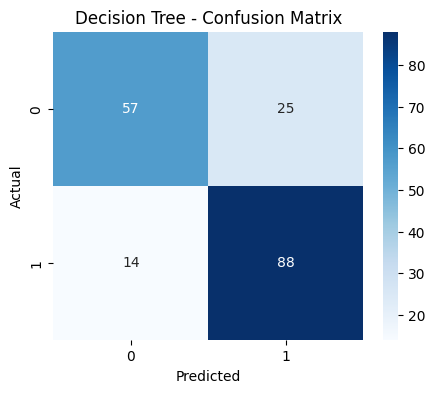

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    print(f"\n============================")
    print(f"Model: {model_name}")
    print("============================")

    print("Accuracy:", accuracy_score(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# RUN EVALUATION FOR ALL 5 MODELS
for name, model in models.items():
    evaluate_model(model, X_test, y_test, name)


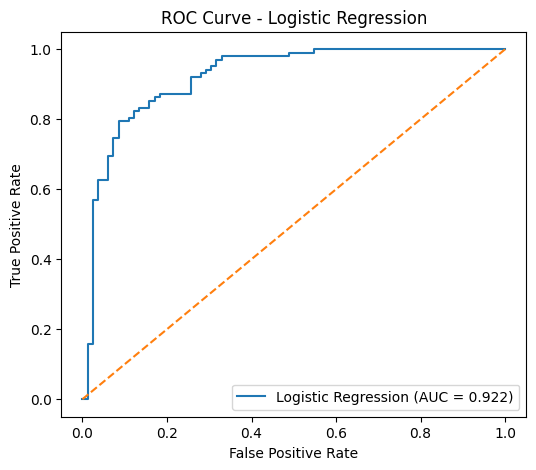

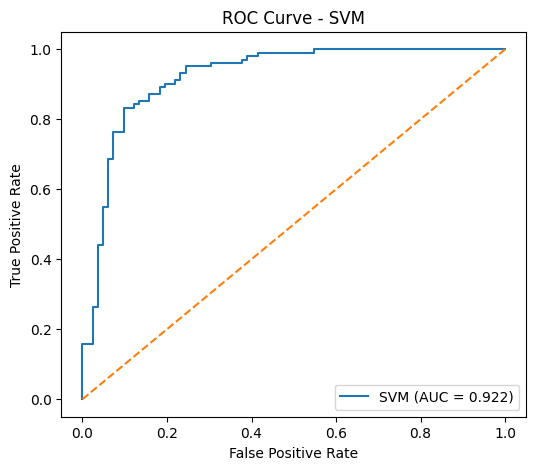

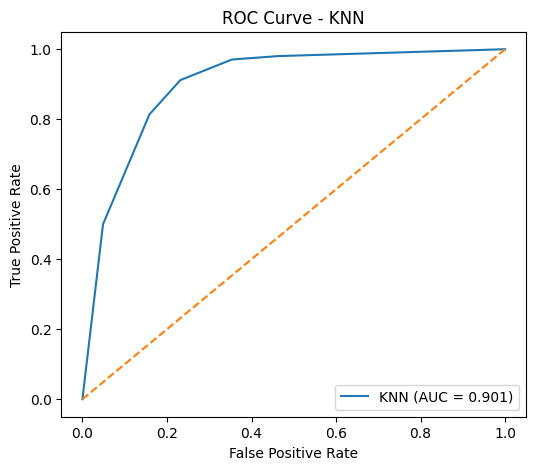

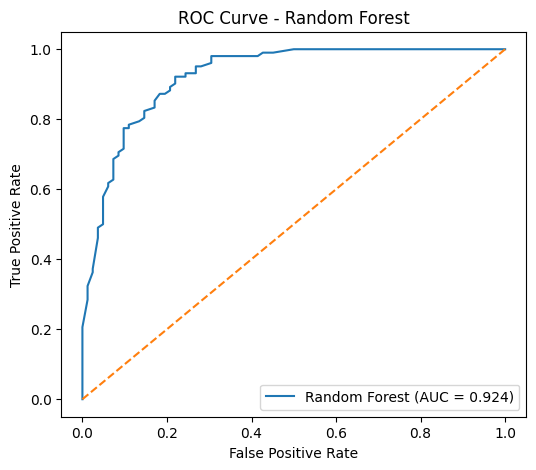

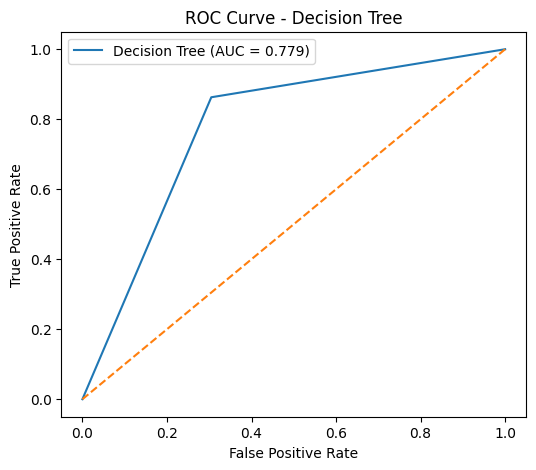

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test, model_name):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
    else:
        print(f"{model_name} does not support ROC curve.")
        return

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend()
    plt.show()


# RUN ROC FOR ALL MODELS
for name, model in models.items():
    plot_roc_curve(model, X_test, y_test, name)


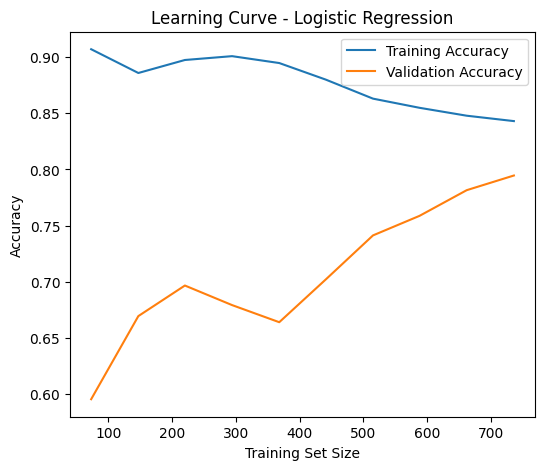

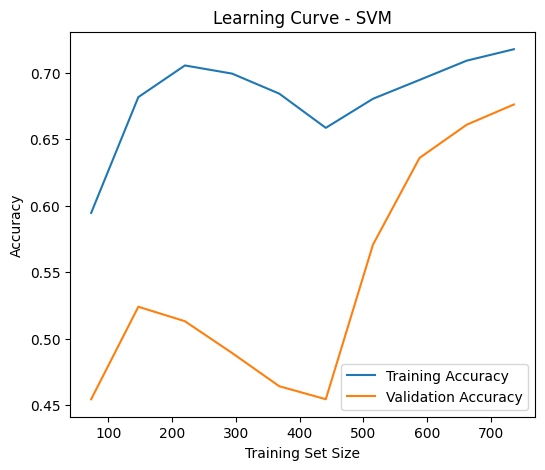

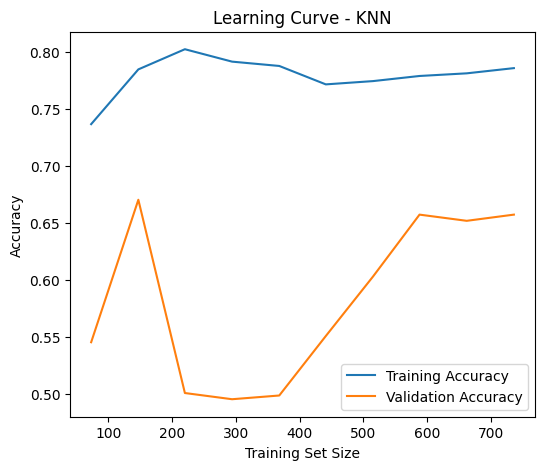

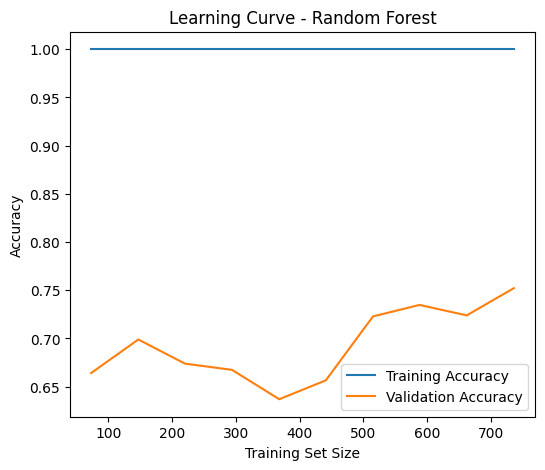

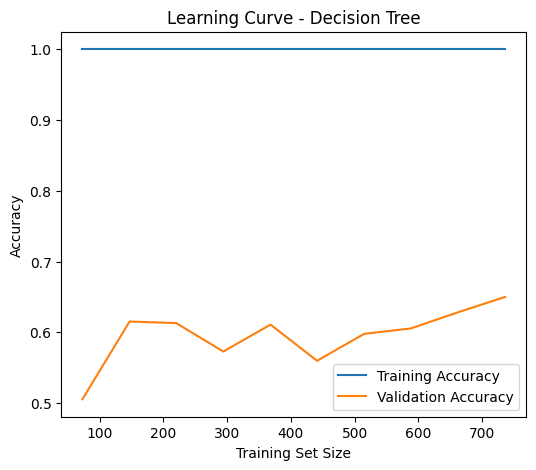

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        cv=5,
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6,5))
    plt.plot(train_sizes, train_mean, label="Training Accuracy")
    plt.plot(train_sizes, test_mean, label="Validation Accuracy")
    plt.title(f"Learning Curve - {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# RUN LEARNING CURVES FOR ALL MODELS
for name, model in models.items():
    plot_learning_curve(model, X, y, name)
